# Preprocessing data generated by car simulator

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\filip\\Desktop\\beta_simulator_windows\\dane\\driving_log.csv', 
                 names=['center','left','right','steering_angle','throttle','break','speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,0.00,0.000000,0.0,1.154715
1,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,0.00,0.000000,0.0,1.145308
2,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,0.00,0.000000,0.0,1.134916
3,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,-0.15,0.149613,0.0,1.188615
4,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,C:\Users\filip\Desktop\beta_simulator_windows\...,-0.30,0.363924,0.0,1.392645


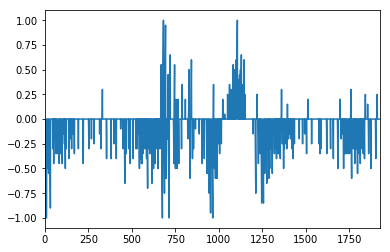

In [11]:
df['steering_angle'].plot()

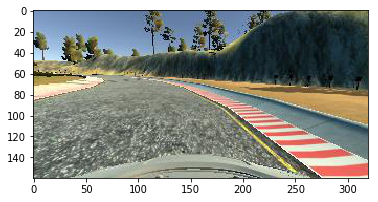

In [16]:
img = Image.open(df['center'][0])
plt.imshow(img)

In [19]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [20]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2, ::4, :]

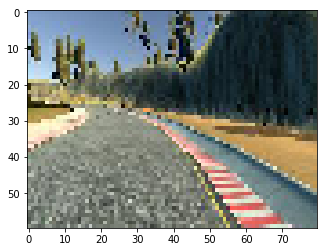

In [21]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [27]:
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]
y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [28]:
X = np.array(X)
print(X.shape)
print(y.shape)

(5778, 60, 80, 3)
(5778,)


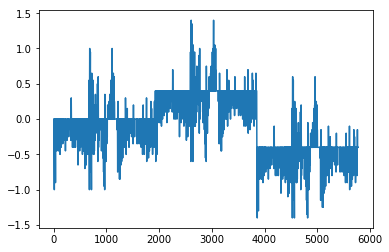

In [30]:
plt.plot(y)
plt.show();

In [31]:
np.save('X.npy',X)
np.save('y.npy',y)